**1. Data preprossessing**

- clean data
- standardize ( change date format to year)
- merge data
- drop sector column, keep only domestic sector

target variables - WaterConsumptionMld
features - state, year, strata, WaterAccessPercent



In [ ]:
import pandas as pd

Water access

In [ ]:
water_access = pd.read_csv("/content/water_access.csv")

In [ ]:
water_access.head()


,state,strata,date,proportion
0,Malaysia,overall,2000-01-01,92.0
1,Malaysia,overall,2001-01-01,92.7
2,Malaysia,overall,2002-01-01,93.2
3,Malaysia,overall,2003-01-01,93.7
4,Malaysia,overall,2004-01-01,94.0


In [ ]:
water_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1035 non-null   object 
 1   strata      1035 non-null   object 
 2   date        1035 non-null   object 
 3   proportion  1035 non-null   float64
dtypes: float64(1), object(3)
memory usage: 32.5+ KB


There is no null.

In [ ]:
water_access.isnull().sum()

,0
state,0
strata,0
date,0
proportion,0


There is no missing value

Standardise column

In [ ]:
water_access.rename(columns={
    "state": "State",
    "strata": "Strata",
    "date": "Year",
    "proportion": "WaterAccessPercent"
}, inplace=True)


converting date to year only format

In [ ]:
water_access["Year"] = pd.to_datetime(water_access["Year"]).dt.year


In [ ]:
water_access.head()


,State,Strata,Year,WaterAccessPercent
0,Malaysia,overall,2000,92.0
1,Malaysia,overall,2001,92.7
2,Malaysia,overall,2002,93.2
3,Malaysia,overall,2003,93.7
4,Malaysia,overall,2004,94.0


Water consumption

In [ ]:
water_consumption = pd.read_csv("/content/water_consumption.csv")
water_consumption.head()
water_consumption.info()
water_consumption.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   600 non-null    object
 1   sector  600 non-null    object
 2   date    600 non-null    object
 3   value   600 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


,0
state,0
sector,0
date,0
value,0


no missing value, no null values.

In [ ]:
water_consumption.rename(columns={
    "state": "State",
    "sector": "Sector",
    "date": "Year",
    "value": "WaterConsumptionMLD"
}, inplace=True)

converting date to year format

In [ ]:
water_consumption["Year"] = pd.to_datetime(water_consumption["Year"]).dt.year

filter sector to domestic consumption only since household, dropping sector column

In [ ]:
water_consumption = water_consumption[water_consumption["Sector"] == "domestic"]
water_consumption.drop(columns=["Sector"], inplace=True)


In [ ]:
water_consumption.duplicated().sum()


np.int64(0)

In [ ]:
water_consumption.head()
water_consumption.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 579
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                300 non-null    object
 1   Year                 300 non-null    int32 
 2   WaterConsumptionMLD  300 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 8.2+ KB


Data merging

In [ ]:
merged_df = pd.merge(
    water_access,
    water_consumption,
    on=["State", "Year"],
    how="left"
)

merged_df.head()

,State,Strata,Year,WaterAccessPercent,WaterConsumptionMLD
0,Malaysia,overall,2000,92.0,NaN
1,Malaysia,overall,2001,92.7,NaN
2,Malaysia,overall,2002,93.2,NaN
3,Malaysia,overall,2003,93.7,4394.0
4,Malaysia,overall,2004,94.0,4770.0


In [ ]:
merged_df.to_csv("merged_water_dataset.csv", index=False)


In [ ]:
from google.colab import files
files.download("merged_water_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

imputating for null - using combination of backward and foward

In [ ]:
merged_water_dataset = pd.read_csv("/content/merged_water_dataset.csv")

In [ ]:
merged_water_dataset["WaterConsumptionMLD"] = (
    merged_water_dataset
    .groupby("State")["WaterConsumptionMLD"]
    .transform(lambda x: x.ffill().bfill())
)


In [ ]:
merged_water_dataset.head(1000)

,State,Strata,Year,WaterAccessPercent,WaterConsumptionMLD
0,Malaysia,overall,2000,92.0,4394.0
1,Malaysia,overall,2001,92.7,4394.0
2,Malaysia,overall,2002,93.2,4394.0
3,Malaysia,overall,2003,93.7,4394.0
4,Malaysia,overall,2004,94.0,4770.0
...,...,...,...,...,...
995,W.P. Labuan,rural,2006,100.0,17.0
996,W.P. Labuan,rural,2007,100.0,18.0
997,W.P. Labuan,rural,2008,100.0,19.0
998,W.P. Labuan,rural,2009,100.0,18.0


In [ ]:
merged_water_dataset.to_csv("cleaned_water_dataset.csv", index=False)


**2. Exploratory Data Analysis (EDA)**

In [ ]:
data = pd.read_csv("/content/cleaned_water_dataset.csv")
data.head()

,State,Strata,Year,WaterAccessPercent,WaterConsumptionMLD
0,Malaysia,overall,2000,92.0,4394.0
1,Malaysia,overall,2001,92.7,4394.0
2,Malaysia,overall,2002,93.2,4394.0
3,Malaysia,overall,2003,93.7,4394.0
4,Malaysia,overall,2004,94.0,4770.0


**Histogram: Water Consumption (MLD)**

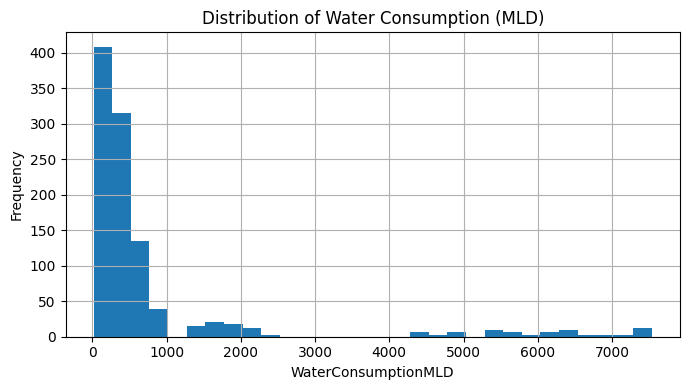

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
data['WaterConsumptionMLD'].dropna().hist(bins=30)
plt.title('Distribution of Water Consumption (MLD)')
plt.xlabel('WaterConsumptionMLD')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Exclude 'Malaysia' from State list name
data['State'] = data['State'].str.strip()
state_data = data[data['State'].str.lower() != 'malaysia'].copy()

print("List of States in Malaysia:")
print(sorted(state_data['State'].unique()))
print("Number of states:", state_data['State'].nunique())

List of States in Malaysia:
['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'W.P. Labuan']
Number of states: 14


**List of States with Water Consumption <296.5 and >296.5 (Median Consumption=296.5)**

In [ ]:
# Default threshold: overall median consumption (states only)
cons_threshold = state_data['WaterConsumptionMLD'].median()
print("Consumption threshold (MLD) =", cons_threshold)

Consumption threshold (MLD) = 308.5


In [ ]:
# States that ever have WaterConsumptionMLD < threshold
low_cons = state_data[state_data['WaterConsumptionMLD'] < cons_threshold].copy()
low_cons_states = sorted(low_cons['State'].unique())

all_states = sorted(state_data['State'].unique())

# States that are always ≥ threshold (no row < threshold)
high_only_cons_states = sorted(set(all_states) - set(low_cons_states))

print("States with at least one year consumption <", cons_threshold, "MLD:")
for s in low_cons_states:
    print("-", s)

print("\nStates always ≥", cons_threshold, "MLD (no year below threshold):")
for s in high_only_cons_states:
    print("-", s)

States with at least one year consumption < 308.5 MLD:
- Kelantan
- Melaka
- Negeri Sembilan
- Pahang
- Perlis
- Sabah
- Sarawak
- Terengganu
- W.P. Labuan

States always ≥ 308.5 MLD (no year below threshold):
- Johor
- Kedah
- Perak
- Pulau Pinang
- Selangor


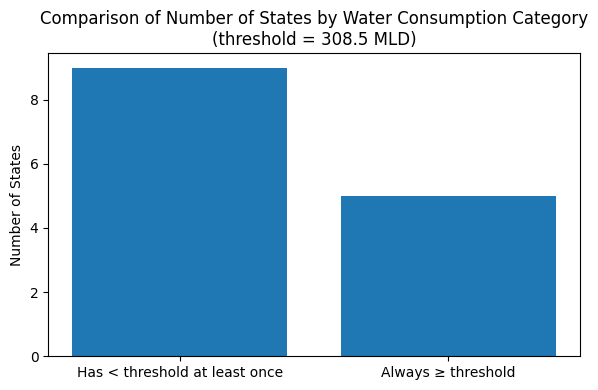

In [ ]:
counts_cons = {
    "Has < threshold at least once": len(low_cons_states),
    "Always ≥ threshold": len(high_only_cons_states)
}

plt.figure(figsize=(6,4))
plt.bar(list(counts_cons.keys()), list(counts_cons.values()))
plt.ylabel("Number of States")
plt.title("Comparison of Number of States by Water Consumption Category\n(threshold = {:.1f} MLD)".format(cons_threshold))
plt.tight_layout()
plt.show()

In [ ]:
cons_summary = (state_data
    .groupby('State')['WaterConsumptionMLD']
    .agg(['count','min','median','max'])
    .sort_values('median')
)

cons_summary

,count,min,median,max
State,,,,
W.P. Labuan,69,16.0,18.0,21.0
Perlis,69,47.0,65.0,82.0
Kelantan,69,94.0,140.0,171.0
Melaka,69,144.0,196.0,230.0
Terengganu,69,156.0,230.0,302.0
Negeri Sembilan,69,181.0,255.0,327.0
Pahang,69,211.0,308.0,391.0
Sabah,69,156.0,313.0,425.0
Sarawak,69,289.0,449.0,602.0


**Analyse the states where both Urban & Rural are always ≥296.5 Water Consumption**

**Analyse the states where both Urban & Rural have at least one year <296.5  Water Consumption**

In [ ]:
# Flag rows where consumption is below the threshold
state_data['Strata'] = state_data['Strata'].str.strip().str.lower()
data_strata = state_data[state_data['Strata'].isin(['urban', 'rural'])].copy()
data_strata = data_strata.assign(below_thr = data_strata['WaterConsumptionMLD'] < cons_threshold)

group_cons = (
    data_strata
    .groupby(['State', 'Strata'])
    .agg(
        n=('WaterConsumptionMLD', 'size'),
        min_cons=('WaterConsumptionMLD', 'min'),
        median_cons=('WaterConsumptionMLD', 'median'),
        max_cons=('WaterConsumptionMLD', 'max'),
        share_below_thr=('below_thr', 'mean')
    )
    .reset_index()
)

# Pivot so we have share_below_thr for urban and rural side by side
share_cons_pivot = group_cons.pivot(index='State', columns='Strata', values='share_below_thr') \
                             .fillna(0)


In [ ]:
# Category 1
cat1_cons_states = share_cons_pivot[
    (share_cons_pivot['rural'] == 0) &
    (share_cons_pivot['urban'] == 0)
].index.tolist()

# Category 2
cat3_cons_states = share_cons_pivot[
    (share_cons_pivot['rural'] > 0) &
    (share_cons_pivot['urban'] > 0)
].index.tolist()

print("Category 1 – Both Urban & Rural always ABOVE or equal to Consumption threshold:")
for s in cat1_cons_states:
    print("-", s)

print("\nCategory 2 – Both Urban & Rural have at least one year BELOW Consumption threshold:")
for s in cat3_cons_states:
    print("-", s)

Category 1 – Both Urban & Rural always ABOVE or equal to Consumption threshold:
- Johor
- Kedah
- Perak
- Pulau Pinang
- Selangor

Category 2 – Both Urban & Rural have at least one year BELOW Consumption threshold:
- Kelantan
- Melaka
- Negeri Sembilan
- Pahang
- Perlis
- Sabah
- Sarawak
- Terengganu
- W.P. Labuan


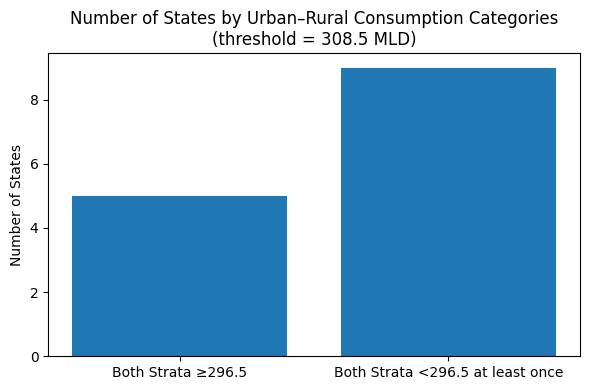

In [ ]:
counts_cons = {
    "Both Strata ≥296.5": len(cat1_cons_states),
    "Both Strata <296.5 at least once": len(cat3_cons_states)
}

plt.figure(figsize=(6,4))
plt.bar(list(counts_cons.keys()), list(counts_cons.values()))
plt.ylabel("Number of States")
plt.title("Number of States by Urban–Rural Consumption Categories\n(threshold = {:.1f} MLD)".format(cons_threshold))
plt.tight_layout()
plt.show()


**Histogram: Percentage of Water Access (%)**

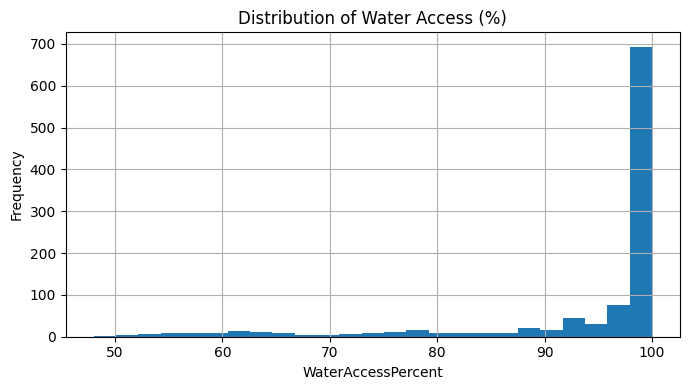

In [ ]:
plt.figure(figsize=(7,4))
data['WaterAccessPercent'].dropna().hist(bins=25)
plt.title('Distribution of Water Access (%)')
plt.xlabel('WaterAccessPercent')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**List of States that have water access <90% and >90%**

In [ ]:
low_access = state_data[state_data['WaterAccessPercent'] < 90].copy()
high_access = state_data[state_data['WaterAccessPercent'] >= 90].copy()

print("Rows with access < 90% (states only):", len(low_access))
print("Rows with access ≥ 90% (states only):", len(high_access))

Rows with access < 90% (states only): 170
Rows with access ≥ 90% (states only): 796


In [ ]:
low_states = sorted(low_access['State'].unique())
print("States that have at least one year with access < 90%:")
for s in low_states:
    print("-", s)


States that have at least one year with access < 90%:
- Kelantan
- Pahang
- Sabah
- Sarawak
- Terengganu


In [ ]:
state_max_access = state_data.groupby('State')['WaterAccessPercent'].max()

always_below_90_states = state_max_access[state_max_access < 90].index.tolist()

print("States with access < 90% for the entire period (all rows):")
for s in always_below_90_states:
    print("-", s)


States with access < 90% for the entire period (all rows):
- Kelantan


In [ ]:
all_states = set(state_data['State'].unique())
high_only_states = sorted(all_states - set(low_states))

print("States that are always ≥ 90% access (no year < 90%):")
for s in high_only_states:
    print("-", s)

States that are always ≥ 90% access (no year < 90%):
- Johor
- Kedah
- Melaka
- Negeri Sembilan
- Perak
- Perlis
- Pulau Pinang
- Selangor
- W.P. Labuan


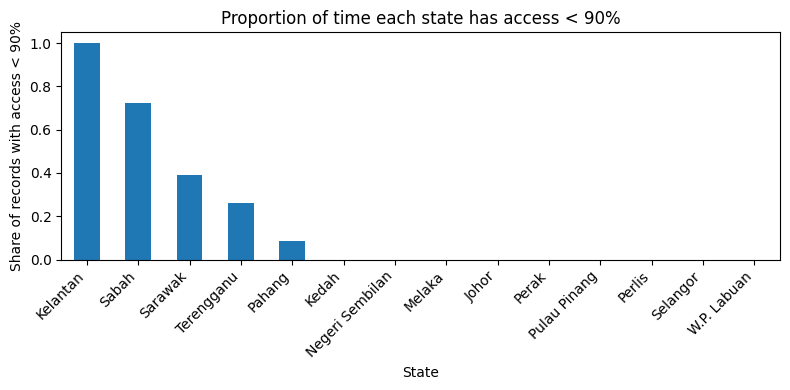

In [ ]:
state_total = state_data.groupby('State').size()
state_low   = low_access.groupby('State').size()
share_low = (state_low / state_total).fillna(0).sort_values(ascending=False)
share_low = share_low.rename("share_low_below_90")

plt.figure(figsize=(8,4))
share_low.plot(kind='bar')
plt.ylabel('Share of records with access < 90%')
plt.title('Proportion of time each state has access < 90%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


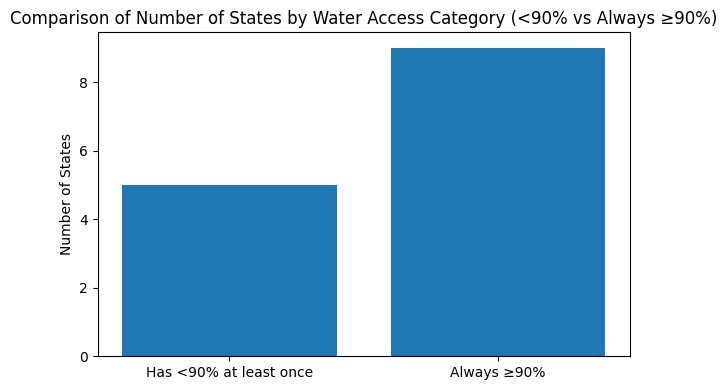

In [ ]:
import numpy as np

counts = {
    "Has <90% at least once": len(low_states),
    "Always ≥90%": len(high_only_states)
}

plt.figure(figsize=(6,4))
plt.bar(list(counts.keys()), list(counts.values()))
plt.ylabel("Number of States")
plt.title("Comparison of Number of States by Water Access Category (<90% vs Always ≥90%)")
plt.tight_layout()
plt.show()


In [ ]:
access_summary = (state_data
    .groupby('State')['WaterAccessPercent']
    .agg(['count','min','median','max'])
    .sort_values('median')
)

access_summary

,count,min,median,max
State,,,,
Kelantan,69,48.0,62.4,82.0
Sabah,69,52.0,79.0,100.0
Terengganu,69,78.0,92.9,100.0
Sarawak,69,54.1,93.7,100.0
Pahang,69,89.0,98.0,100.0
Kedah,69,92.5,98.3,100.0
Perlis,69,97.0,99.5,100.0
Perak,69,97.2,99.6,100.0
Johor,69,98.0,99.8,100.0


**Analyse the states where both Urban & Rural are always ≥90% Water Access**

**Analyse the states where both Urban & Rural have at least one year <90%  Water Access**

In [ ]:
state_data['Strata'] = state_data['Strata'].str.strip().str.lower()
data_strata = state_data[state_data['Strata'].isin(['urban', 'rural'])].copy()

# Create a flag below 90%
data_strata = data_strata.assign(below90 = data_strata['WaterAccessPercent'] < 90)

group_stats = (
    data_strata
    .groupby(['State', 'Strata'])
    .agg(
        n=('WaterAccessPercent', 'size'),
        min_access=('WaterAccessPercent', 'min'),
        median_access=('WaterAccessPercent', 'median'),
        max_access=('WaterAccessPercent', 'max'),
        share_below90=('below90', 'mean')
    )
    .reset_index()
)

# Pivot: State rows, Urban/Rural columns for share_below90
share_pivot = group_stats.pivot(index='State', columns='Strata', values='share_below90') \
                         .fillna(0)


In [ ]:
# Category 1: both strata always >= 90% (no year below 90%)
cat1_states = share_pivot[
    (share_pivot['rural'] == 0) &
    (share_pivot['urban'] == 0)
].index.tolist()

# Category 2: both strata have at least one year < 90%
cat3_states = share_pivot[
    (share_pivot['rural'] > 0) &
    (share_pivot['urban'] > 0)
].index.tolist()

print("Category 1 – Both Urban & Rural always ≥ 90% Water Access:")
for s in cat1_states:
    print("-", s)

print("\nCategory 2 – Both Urban & Rural have at least one year < 90% Water Access:")
for s in cat3_states:
    print("-", s)


Category 1 – Both Urban & Rural always ≥ 90% Water Access:
- Johor
- Kedah
- Melaka
- Negeri Sembilan
- Perak
- Perlis
- Pulau Pinang
- Selangor
- W.P. Labuan

Category 2 – Both Urban & Rural have at least one year < 90% Water Access:
- Kelantan
- Sabah
- Terengganu


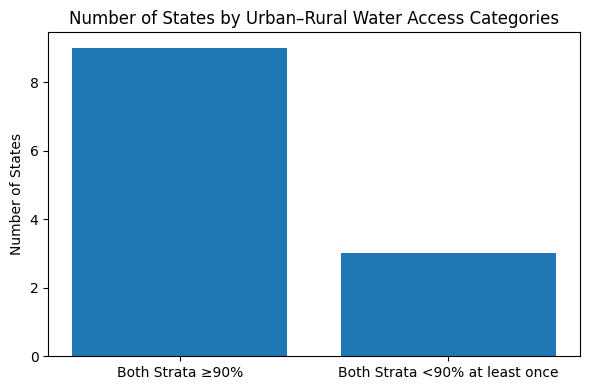

In [ ]:
counts = {
    "Both Strata ≥90%": len(cat1_states),
    "Both Strata <90% at least once": len(cat3_states)
}

plt.figure(figsize=(6,4))
plt.bar(list(counts.keys()), list(counts.values()))
plt.ylabel("Number of States")
plt.title("Number of States by Urban–Rural Water Access Categories")
plt.tight_layout()
plt.show()


**Boxplot: Overall Water Consumption by Strata (Urban vs Rural)**

<Figure size 600x400 with 0 Axes>

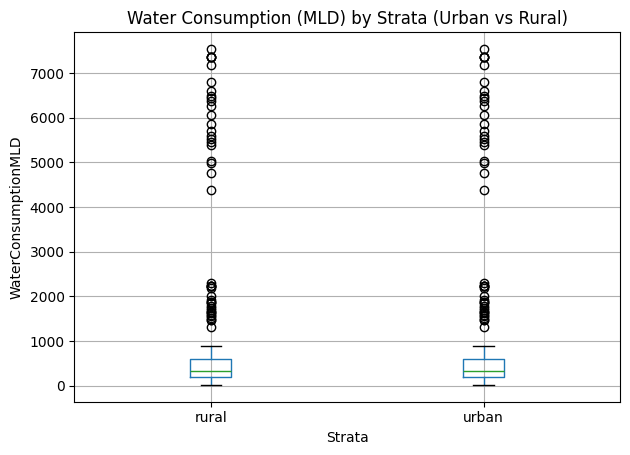

In [ ]:
data_strata = data[data['Strata'].str.lower().isin(['urban', 'rural'])].copy()

plt.figure(figsize=(6,4))
data_strata.boxplot(column='WaterConsumptionMLD', by='Strata')
plt.title('Water Consumption (MLD) by Strata (Urban vs Rural)')
plt.suptitle('')
plt.xlabel('Strata')
plt.ylabel('WaterConsumptionMLD')
plt.tight_layout()
plt.show()

**Trend of Median Water Access (%) by Year & Strata**

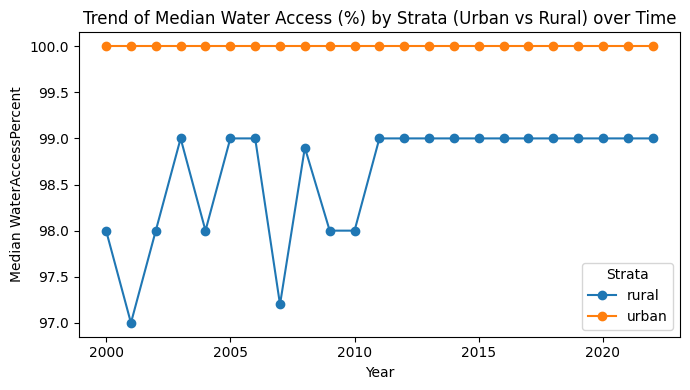

In [ ]:
data_strata = data[data['Strata'].str.lower().isin(['urban', 'rural'])].copy()
trend = data_strata.groupby(['Year', 'Strata'])['WaterAccessPercent'] \
                    .median() \
                    .unstack()

plt.figure(figsize=(7,4))
for col in trend.columns:
    plt.plot(trend.index, trend[col], marker='o', label=str(col))

plt.title('Trend of Median Water Access (%) by Strata (Urban vs Rural) over Time')
plt.xlabel('Year')
plt.ylabel('Median WaterAccessPercent')
plt.legend(title='Strata')
plt.tight_layout()
plt.show()



**Trend of Median Water Consumption (MLD) by Year & Strata**

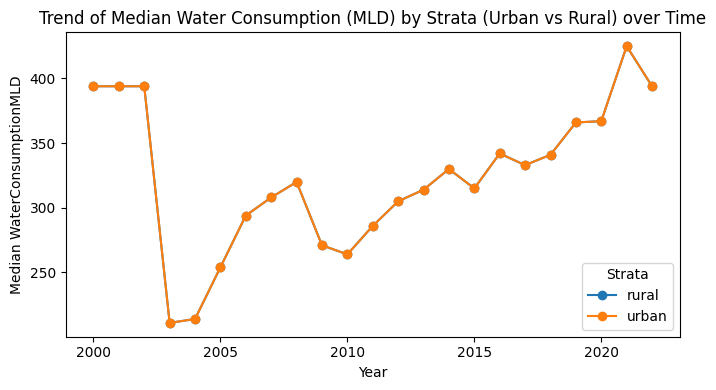

In [ ]:
data_strata = data[data['Strata'].str.lower().isin(['urban', 'rural'])].copy()
trend = data_strata.groupby(['Year', 'Strata'])['WaterConsumptionMLD'] \
                     .median() \
                     .unstack()

plt.figure(figsize=(7,4))
for col in trend.columns:
    plt.plot(trend.index, trend[col], marker='o', label=str(col))

plt.title('Trend of Median Water Consumption (MLD) by Strata (Urban vs Rural) over Time')
plt.xlabel('Year')
plt.ylabel('Median WaterConsumptionMLD')
plt.legend(title='Strata')
plt.tight_layout()
plt.show()


**Water Access vs Water Consumption Relationship (Correlation)**

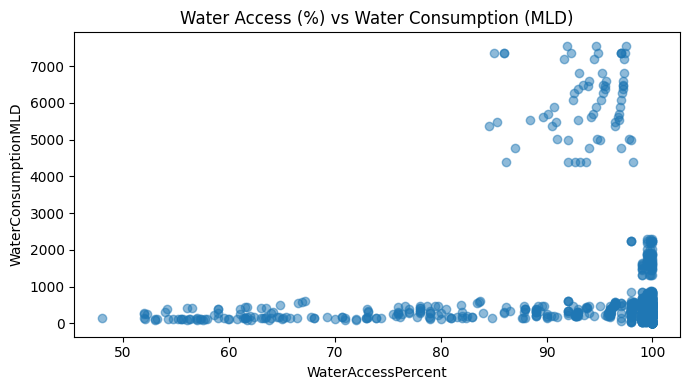

,WaterAccessPercent,WaterConsumptionMLD
WaterAccessPercent,1.00000,0.05309
WaterConsumptionMLD,0.05309,1.00000


In [ ]:
# Remove missing values
sub = data.dropna(subset=['WaterAccessPercent','WaterConsumptionMLD'])

plt.figure(figsize=(7,4))
plt.scatter(sub['WaterAccessPercent'], sub['WaterConsumptionMLD'], alpha=0.5)
plt.title('Water Access (%) vs Water Consumption (MLD)')
plt.xlabel('WaterAccessPercent')
plt.ylabel('WaterConsumptionMLD')
plt.tight_layout()
plt.show()

# Correlation
sub[['WaterAccessPercent','WaterConsumptionMLD']].corr()


In [ ]:
# remove the 'overall' strata since we want to analyze difference between urban and rural strata.
data = merged_df[merged_df['Strata'] != 'overall'].copy()
data["WaterConsumptionMLD"] = data.groupby("State")["WaterConsumptionMLD"].transform(lambda x: x.ffill().bfill())
data.dropna(subset=['WaterConsumptionMLD'], inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
treated_overall_df = pd.read_csv('/content/Treated Overall By Year.csv')

# Display the first 5 rows to understand the data
display(treated_overall_df.head())

,Year,Treated
0,2020,"463,898,001"
1,2021,"440,542,070"
2,2022,"500,686,587"
3,2023,"527,032,957"


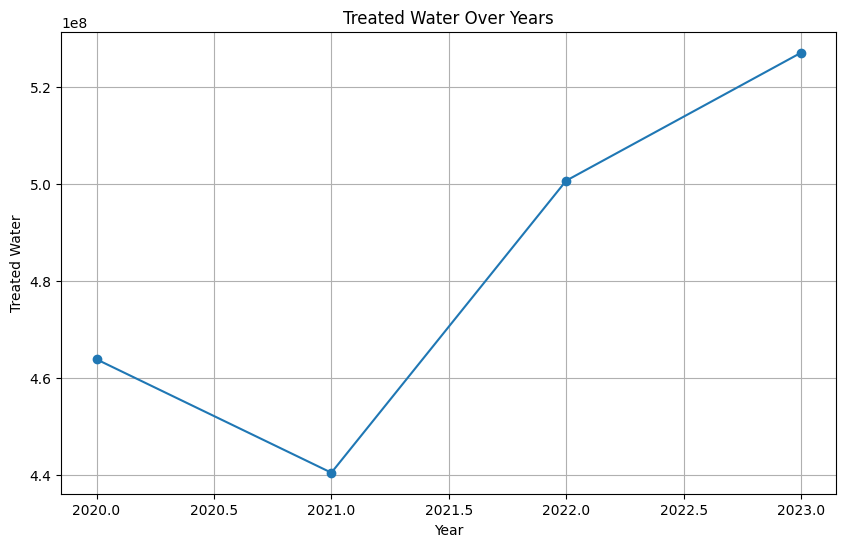

In [ ]:
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(treated_overall_df['Year'], treated_overall_df['Treated'], marker='o', linestyle='-')
plt.title('Treated Water Over Years')
plt.xlabel('Year')
plt.ylabel('Treated Water')
plt.grid(True)
plt.show()

In [ ]:
# Display column information to check data types
display(treated_overall_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     4 non-null      int64 
 1   Treated  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


None

# FEATURE ENGINEERING

In [ ]:
data['Strata_encoded'] = data['Strata'].map({'rural': 0, 'urban': 1})

In [ ]:
# Access-adjusted consumption
data['AccessAdjustedConsumption'] = (
    data['WaterConsumptionMLD'] * (data['WaterAccessPercent'] / 100)
)

In [ ]:
# Access change (growth)
data = data.sort_values('Year')

data['AccessChange'] = data['WaterAccessPercent'].diff()

In [ ]:
# Interaction feature
data['AccessChange'] = data.groupby('State')['WaterAccessPercent'].diff().fillna(0)
data['Year_Access_Interaction'] = (
    data['Year'] * data['WaterAccessPercent']
)

In [ ]:
data

,State,Strata,Year,WaterAccessPercent,WaterConsumptionMLD,Strata_encoded,AccessAdjustedConsumption,AccessChange,Year_Access_Interaction
23,Malaysia,rural,2000,85.0,4394.0,0,3734.900,0.0,170000.0
1012,W.P. Labuan,urban,2000,100.0,19.0,1,19.000,0.0,200000.0
92,Johor,rural,2000,98.0,560.0,0,548.800,0.0,196000.0
920,Terengganu,rural,2000,78.0,156.0,0,121.680,0.0,156000.0
874,Selangor,urban,2000,100.0,2230.0,1,2230.000,0.0,200000.0
...,...,...,...,...,...,...,...,...,...
183,Kedah,rural,2022,96.5,560.0,0,540.400,-3.5,195123.0
68,Malaysia,urban,2022,97.4,7353.0,1,7161.822,-0.1,196942.8
114,Johor,rural,2022,99.8,867.0,0,865.266,-0.2,201795.6
1011,W.P. Labuan,rural,2022,100.0,19.0,0,19.000,0.0,202200.0


In [ ]:
# Drop rows with missing values created by AccessChange(growth)
data_model = data.dropna().reset_index(drop=True)

In [ ]:
data_model

,State,Strata,Year,WaterAccessPercent,WaterConsumptionMLD,Strata_encoded,AccessAdjustedConsumption,AccessChange,Year_Access_Interaction
0,Malaysia,rural,2000,85.0,4394.0,0,3734.900,0.0,170000.0
1,W.P. Labuan,urban,2000,100.0,19.0,1,19.000,0.0,200000.0
2,Johor,rural,2000,98.0,560.0,0,548.800,0.0,196000.0
3,Terengganu,rural,2000,78.0,156.0,0,121.680,0.0,156000.0
4,Selangor,urban,2000,100.0,2230.0,1,2230.000,0.0,200000.0
...,...,...,...,...,...,...,...,...,...
685,Kedah,rural,2022,96.5,560.0,0,540.400,-3.5,195123.0
686,Malaysia,urban,2022,97.4,7353.0,1,7161.822,-0.1,196942.8
687,Johor,rural,2022,99.8,867.0,0,865.266,-0.2,201795.6
688,W.P. Labuan,rural,2022,100.0,19.0,0,19.000,0.0,202200.0


In [ ]:
# removing Malaysia since we want only to analyse state in Malaysia with rural vs urban
data_model = data_model[data_model['State'] != 'Malaysia'].copy()
data_model

,State,Strata,Year,WaterAccessPercent,WaterConsumptionMLD,Strata_encoded,AccessAdjustedConsumption,AccessChange,Year_Access_Interaction
1,W.P. Labuan,urban,2000,100.0,19.0,1,19.000,0.0,200000.0
2,Johor,rural,2000,98.0,560.0,0,548.800,0.0,196000.0
3,Terengganu,rural,2000,78.0,156.0,0,121.680,0.0,156000.0
4,Selangor,urban,2000,100.0,2230.0,1,2230.000,0.0,200000.0
5,Pulau Pinang,urban,2000,100.0,534.0,1,534.000,0.0,200000.0
...,...,...,...,...,...,...,...,...,...
683,Negeri Sembilan,urban,2022,100.0,307.0,1,307.000,0.2,202200.0
684,Johor,urban,2022,100.0,867.0,1,867.000,0.2,202200.0
685,Kedah,rural,2022,96.5,560.0,0,540.400,-3.5,195123.0
687,Johor,rural,2022,99.8,867.0,0,865.266,-0.2,201795.6


# **MODEL DEVELOPMENT**

**Label Encode**

In [ ]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

# Encode 'Strata' column
label_encoder = LabelEncoder()
data_model['Strata_encoded'] = label_encoder.fit_transform(data_model['Strata'])

# Encode 'State' column
state_encoder = LabelEncoder()
data_model['State_encoded'] = state_encoder.fit_transform(data_model['State'])

# Display encoded values
print("Encoded Strata Classes:", label_encoder.classes_)
print("Encoded State Classes:", state_encoder.classes_)


Encoded Strata Classes: ['rural' 'urban']
Encoded State Classes: ['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang' 'Perak'
 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Labuan']


In [ ]:
display_data = data_model.sort_values('Strata').reset_index(drop=True)
print(display_data[['Year', 'State', 'Strata', 'WaterConsumptionMLD', 'Strata_encoded', 'State_encoded']])

     Year        State Strata  WaterConsumptionMLD  Strata_encoded  \
0    2022  W.P. Labuan  rural                 19.0               0   
1    2018        Sabah  rural                341.0               0   
2    2009     Kelantan  rural                124.0               0   
3    2018       Melaka  rural                209.0               0   
4    2009        Perak  rural                526.0               0   
..    ...          ...    ...                  ...             ...   
639  2009   Terengganu  urban                198.0               1   
640  2009        Johor  urban                713.0               1   
641  2009        Perak  urban                526.0               1   
642  2009      Sarawak  urban                441.0               1   
643  2011       Pahang  urban                286.0               1   

     State_encoded  
0               13  
1                9  
2                2  
3                3  
4                6  
..             ...  
639         

**Feature Selection**

In [ ]:
import pandas as pd

print("Current Columns in data_model:")
print(data_model.columns.tolist())

Current Columns in data_model:
['State', 'Strata', 'Year', 'WaterAccessPercent', 'WaterConsumptionMLD', 'Strata_encoded', 'AccessAdjustedConsumption', 'AccessChange', 'Year_Access_Interaction', 'State_encoded']


In [ ]:
# ANOVA
from sklearn.feature_selection import f_regression
import pandas as pd
import numpy as np

# Define features for ANOVA
FEATURE_COLUMNS = [
    'Year',
    'WaterAccessPercent',
    'Strata_encoded',
    'State_encoded',
    'AccessChange',
    'Year_Access_Interaction',
    'AccessAdjustedConsumption'
]

def run_clean_anova(data_frame, features, target_col):

    X_anova = data_frame.loc[:, features]
    y_anova = data_frame[target_col]

    # Initialize list before final DataFrame creation
    results_list = []

# Perform ANOVA
    for feature in features:
        F_value, p_value = f_regression(X_anova[[feature]], y_anova)

        results_list.append({
            'Feature': [feature],
            'F-value': F_value[0],
            'p-value': p_value[0]
         })

    final_results = pd.DataFrame(results_list)

  # Sort by F-value (most significant features first)
    final_results = final_results.sort_values(by='F-value', ascending=False).reset_index(drop=True)

    return final_results

anova_results = run_clean_anova(data_model, FEATURE_COLUMNS, 'WaterConsumptionMLD')

print("ANOVA Results for Numerical Features:\n")
print(anova_results)


ANOVA Results for Numerical Features:

                       Feature        F-value       p-value
0  [AccessAdjustedConsumption]  119444.208111  0.000000e+00
1    [Year_Access_Interaction]      27.985322  1.679060e-07
2         [WaterAccessPercent]      27.308267  2.348481e-07
3                       [Year]       7.765936  5.481432e-03
4              [State_encoded]       5.024258  2.533551e-02
5             [Strata_encoded]       0.657957  4.175826e-01
6               [AccessChange]       0.058688  8.086595e-01


In [ ]:
# Chi Square
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np

# target discretization
data_chi = data_model.copy()

data_chi['Consumption_Level'] = pd.qcut(
    data_chi['WaterConsumptionMLD'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Feature and Target
FEATURE_COLUMNS_CHI = [
    'State_encoded',
    'Strata_encoded',
    'Year',
    'WaterAccessPercent'
]

X = data_chi[FEATURE_COLUMNS_CHI]
y = data_chi['Consumption_Level']

# All features must be integer encoded for the chi2 to function

X_encoded = pd.DataFrame()

for feature in X.columns:
  le = LabelEncoder()

  if feature == 'WaterAccessPercent':
    #Bin continuous features into 4 bins before encoding
    binned_access = pd.qcut(X[feature], q=4, labels=False, duplicates='drop')
    X_encoded[feature] = le.fit_transform(binned_access)
  else:
    X_encoded[feature] = le.fit_transform(X[feature])

# Encoded target 'y' with integers
y_encoded = LabelEncoder().fit_transform(y)

# Perform chi squared test
chi_scores, p_values_chi = chi2(X_encoded, y_encoded)

# Create results DataFrame
chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi-squared score": chi_scores,
    "p-value": p_values_chi
})

# Sort and display results
chi2_results = chi2_results.sort_values(by="Chi-squared score", ascending=False).reset_index(drop=True)
print("\nChi-squared test results:\n", chi2_results)





Chi-squared test results:
               Feature  Chi-squared score       p-value
0                Year          88.095528  7.418210e-20
1       State_encoded          30.904443  1.946191e-07
2  WaterAccessPercent          14.443108  7.306662e-04
3      Strata_encoded           0.874448  6.458267e-01


**Feature and Target Selection**

**Urban vs Rural**

In [ ]:
FEATURES = [
    'Year',
    'WaterAccessPercent',
    'State_encoded',
    'AccessChange',
    'Year_Access_Interaction',
    'AccessAdjustedConsumption'
]

TARGET = 'WaterConsumptionMLD'


In [ ]:
# Split dataset by strata
urban_data = data_model[data_model['Strata'] == 'urban'].copy()
rural_data = data_model[data_model['Strata'] == 'rural'].copy()

print("Urban samples:", urban_data.shape)
print("Rural samples:", rural_data.shape)


Urban samples: (322, 10)
Rural samples: (322, 10)


**Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df):
    X = df[FEATURES]
    y = df[TARGET]

    return train_test_split(
        X, y, test_size=0.2, random_state=42
    )

X_train_u, X_test_u, y_train_u, y_test_u = split_data(urban_data)
X_train_r, X_test_r, y_train_r, y_test_r = split_data(rural_data)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_u = StandardScaler()
X_train_u_scaled = scaler_u.fit_transform(X_train_u)
X_test_u_scaled = scaler_u.transform(X_test_u)

scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)


# **MACHINE LEARNING ALGORITHM**

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**MULTIPLE LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

# URBAN
# Train model
lr_urban = LinearRegression()
lr_urban.fit(X_train_u, y_train_u)

# Predict
y_pred_u_lr = lr_urban.predict(X_test_u)

# Evaluation metrics
rmse_u_lr = math.sqrt(mean_squared_error(y_test_u, y_pred_u_lr))
mae_u_lr = mean_absolute_error(y_test_u, y_pred_u_lr)
r2_u_lr = r2_score(y_test_u, y_pred_u_lr)

print("\nMultiple Linear Regression (Urban) Evaluation Metrics:")
print(f"RMSE: {rmse_u_lr:.4f}")
print(f"MAE: {mae_u_lr:.4f}")
print(f"R²: {r2_u_lr:.4f}")

# RURAL

# Train model
lr_rural = LinearRegression()
lr_rural.fit(X_train_r, y_train_r)

# Predict
y_pred_r_lr = lr_rural.predict(X_test_r)

# Evaluation metrics
rmse_r_lr = math.sqrt(mean_squared_error(y_test_r, y_pred_r_lr))
mae_r_lr = mean_absolute_error(y_test_r, y_pred_r_lr)
r2_r_lr = r2_score(y_test_r, y_pred_r_lr)

print("\nMultiple Linear Regression (Rural) Evaluation Metrics:")
print(f"RMSE: {rmse_r_lr:.4f}")
print(f"MAE: {mae_r_lr:.4f}")
print(f"R²: {r2_r_lr:.4f}")



Multiple Linear Regression (Urban) Evaluation Metrics:
RMSE: 4.4815
MAE: 1.9789
R²: 0.9998

Multiple Linear Regression (Rural) Evaluation Metrics:
RMSE: 15.2943
MAE: 8.3176
R²: 0.9977


**SUPPORT VECTOR REGRESSION (SVR)**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# URBAN
svr = SVR(kernel='rbf')

grid_svr_u = GridSearchCV(
    svr,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_svr_u.fit(X_train_u_scaled, y_train_u)
svr_urban = grid_svr_u.best_estimator_

y_pred_u_svr = svr_urban.predict(X_test_u_scaled)

rmse_u_svr = math.sqrt(mean_squared_error(y_test_u, y_pred_u_svr))
mae_u_svr = mean_absolute_error(y_test_u, y_pred_u_svr)
r2_u_svr = r2_score(y_test_u, y_pred_u_svr)

print("\nSVR (Urban)")
print(f"RMSE: {rmse_u_svr:.4f}")
print(f"MAE: {mae_u_svr:.4f}")
print(f"R²: {r2_u_svr:.4f}")

# RURAL
grid_svr_r = GridSearchCV(
    svr,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_svr_r.fit(X_train_r_scaled, y_train_r)
svr_rural = grid_svr_r.best_estimator_

y_pred_r_svr = svr_rural.predict(X_test_r_scaled)

rmse_r_svr = math.sqrt(mean_squared_error(y_test_r, y_pred_r_svr))
mae_r_svr = mean_absolute_error(y_test_r, y_pred_r_svr)
r2_r_svr = r2_score(y_test_r, y_pred_r_svr)

print("\nSVR (Rural)")
print(f"RMSE: {rmse_r_svr:.4f}")
print(f"MAE: {mae_r_svr:.4f}")
print(f"R²: {r2_r_svr:.4f}")




SVR (Urban)
RMSE: 42.5040
MAE: 25.9001
R²: 0.9855

SVR (Rural)
RMSE: 35.6369
MAE: 23.2719
R²: 0.9875


**RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# URBAN

rf_urban = RandomForestRegressor(random_state=42)
rf_urban.fit(X_train_u, y_train_u)

y_pred_u_rf = rf_urban.predict(X_test_u)

rmse_u_rf = math.sqrt(mean_squared_error(y_test_u, y_pred_u_rf))
mae_u_rf = mean_absolute_error(y_test_u, y_pred_u_rf)
r2_u_rf = r2_score(y_test_u, y_pred_u_rf)

print("\nRandom Forest (Urban)")
print(f"RMSE: {rmse_u_rf:.4f}")
print(f"MAE: {mae_u_rf:.4f}")
print(f"R²: {r2_u_rf:.4f}")

# RURAL
rf_rural = RandomForestRegressor(random_state=42)
rf_rural.fit(X_train_r, y_train_r)

y_pred_r_rf = rf_rural.predict(X_test_r)

rmse_r_rf = math.sqrt(mean_squared_error(y_test_r, y_pred_r_rf))
mae_r_rf = mean_absolute_error(y_test_r, y_pred_r_rf)
r2_r_rf = r2_score(y_test_r, y_pred_r_rf)

print("\nRandom Forest (Rural)")
print(f"RMSE: {rmse_r_rf:.4f}")
print(f"MAE: {mae_r_rf:.4f}")
print(f"R²: {r2_r_rf:.4f}")



Random Forest (Urban)
RMSE: 5.4709
MAE: 3.5263
R²: 0.9998

Random Forest (Rural)
RMSE: 22.2609
MAE: 13.0483
R²: 0.9951


**XGBOOST REGRESSION**

In [ ]:
from xgboost import XGBRegressor

# URBAN
xgb_urban = XGBRegressor(
    random_state=42,
    objective='reg:squarederror'
)

xgb_urban.fit(X_train_u, y_train_u)

y_pred_u_xgb = xgb_urban.predict(X_test_u)

rmse_u_xgb = math.sqrt(mean_squared_error(y_test_u, y_pred_u_xgb))
mae_u_xgb = mean_absolute_error(y_test_u, y_pred_u_xgb)
r2_u_xgb = r2_score(y_test_u, y_pred_u_xgb)

print("\nXGBoost (Urban)")
print(f"RMSE: {rmse_u_xgb:.4f}")
print(f"MAE: {mae_u_xgb:.4f}")
print(f"R²: {r2_u_xgb:.4f}")

# RURAL
xgb_rural = XGBRegressor(
    random_state=42,
    objective='reg:squarederror'
)

xgb_rural.fit(X_train_r, y_train_r)

y_pred_r_xgb = xgb_rural.predict(X_test_r)

rmse_r_xgb = math.sqrt(mean_squared_error(y_test_r, y_pred_r_xgb))
mae_r_xgb = mean_absolute_error(y_test_r, y_pred_r_xgb)
r2_r_xgb = r2_score(y_test_r, y_pred_r_xgb)

print("\nXGBoost (Rural)")
print(f"RMSE: {rmse_r_xgb:.4f}")
print(f"MAE: {mae_r_xgb:.4f}")
print(f"R²: {r2_r_xgb:.4f}")



XGBoost (Urban)
RMSE: 8.4369
MAE: 5.2217
R²: 0.9994

XGBoost (Rural)
RMSE: 17.3442
MAE: 10.0253
R²: 0.9970


**ARTIFICIAL NEURAL NETWORK (ANN)**

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# URBAN
ann_urban = Sequential()
ann_urban.add(Dense(32, activation='relu', input_shape=(X_train_u_scaled.shape[1],)))
ann_urban.add(Dense(16, activation='relu'))
ann_urban.add(Dense(1))

ann_urban.compile(
    optimizer='adam',
    loss='mse'
)

ann_urban.fit(
    X_train_u_scaled,
    y_train_u,
    epochs=100,
    batch_size=16,
    verbose=0
)

y_pred_u_ann = ann_urban.predict(X_test_u_scaled).flatten()

rmse_u_ann = math.sqrt(mean_squared_error(y_test_u, y_pred_u_ann))
mae_u_ann = mean_absolute_error(y_test_u, y_pred_u_ann)
r2_u_ann = r2_score(y_test_u, y_pred_u_ann)

print("\nANN (Urban)")
print(f"RMSE: {rmse_u_ann:.4f}")
print(f"MAE: {mae_u_ann:.4f}")
print(f"R²: {r2_u_ann:.4f}")

# RURAL
ann_rural = Sequential()
ann_rural.add(Dense(32, activation='relu', input_shape=(X_train_r_scaled.shape[1],)))
ann_rural.add(Dense(16, activation='relu'))
ann_rural.add(Dense(1))

ann_rural.compile(
    optimizer='adam',
    loss='mse'
)

ann_rural.fit(
    X_train_r_scaled,
    y_train_r,
    epochs=100,
    batch_size=16,
    verbose=0
)

y_pred_r_ann = ann_rural.predict(X_test_r_scaled).flatten()

rmse_r_ann = math.sqrt(mean_squared_error(y_test_r, y_pred_r_ann))
mae_r_ann = mean_absolute_error(y_test_r, y_pred_r_ann)
r2_r_ann = r2_score(y_test_r, y_pred_r_ann)

print("\nANN (Rural)")
print(f"RMSE: {rmse_r_ann:.4f}")
print(f"MAE: {mae_r_ann:.4f}")
print(f"R²: {r2_r_ann:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

ANN (Urban)
RMSE: 49.8213
MAE: 37.1796
R²: 0.9801


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

ANN (Rural)
RMSE: 68.8438
MAE: 54.4841
R²: 0.9535


**MODEL COMPARISON SUMMARY**

In [ ]:
comparison = pd.DataFrame({
    "Model": [
        "Multiple Linear Regression",
        "SVR",
        "Random Forest",
        "XGBoost",
        "ANN"
    ],
    "Urban RMSE": [
        rmse_u_lr,
        rmse_u_svr,
        rmse_u_rf,
        rmse_u_xgb,
        rmse_u_ann
    ],
    "Urban R²": [
        r2_u_lr,
        r2_u_svr,
        r2_u_rf,
        r2_u_xgb,
        r2_u_ann
    ],
    "Rural RMSE": [
        rmse_r_lr,
        rmse_r_svr,
        rmse_r_rf,
        rmse_r_xgb,
        rmse_r_ann
    ],
    "Rural R²": [
        r2_r_lr,
        r2_r_svr,
        r2_r_rf,
        r2_r_xgb,
        r2_r_ann
    ]
})

comparison


,Model,Urban RMSE,Urban R²,Rural RMSE,Rural R²
0,Multiple Linear Regression,4.481530,0.999839,15.294297,0.997704
1,SVR,42.503995,0.985511,35.636899,0.987534
2,Random Forest,5.470897,0.999760,22.260861,0.995136
3,XGBoost,8.436860,0.999429,17.344193,0.997047
4,ANN,49.821283,0.980093,68.843802,0.953480


Interpretation:
- MLR achieved the best performance since it has the lowest RMSE in both urban and rural models. The highest R² values , indicating that it explained all variance in water consumption.
- MLR is the most suitable model for deployment.
- The interpretability of MLR coeefficients allows policymakers and water authorities to clearly understand on how factors such as treated water access, infrastructure growth and urban-rural differences influence water consumption which is critical for sustainable water resource planning.